In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import skimage.io
from skimage import measure
from skimage import color,exposure,img_as_float,io
from skimage.util import view_as_blocks
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

In [2]:
route ="Data/Images/varias/varias_6.png"

In [3]:
#LegoImage = img_as_float(io.imread(route)) # img_as_float normalice all the values between 0 and 1
LegoImage = cv2.imread(route, cv2.IMREAD_COLOR)

In [4]:
# Obtener las dimensiones de la imagen
#LegoImage[0]=height
#LegoImage[1]=width
height, width, channels = LegoImage.shape

# Imprimir las dimensiones
print(f'Altura: {height} píxeles')
print(f'Ancho: {width} píxeles')
print(f'Canales de color: {channels}')

Altura: 480 píxeles
Ancho: 640 píxeles
Canales de color: 3


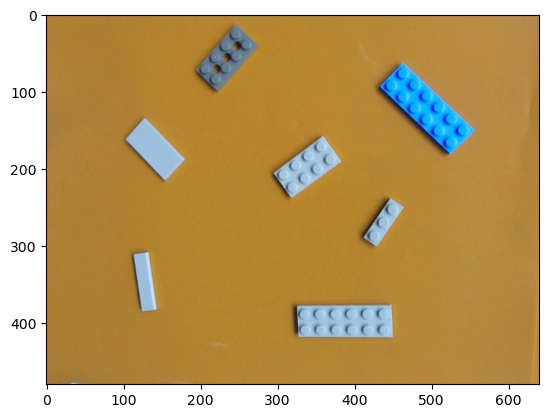

In [5]:
plt.imshow(LegoImage)

In [6]:
hist_Channel0 = cv2.calcHist([LegoImage], channels=[0], mask=None, histSize=[256], ranges=[0,255])
hist_Channel1 = cv2.calcHist([LegoImage], channels=[1], mask=None, histSize=[256], ranges=[0,255])
hist_Channel2 = cv2.calcHist([LegoImage], channels=[2], mask=None, histSize=[256], ranges=[0,255])

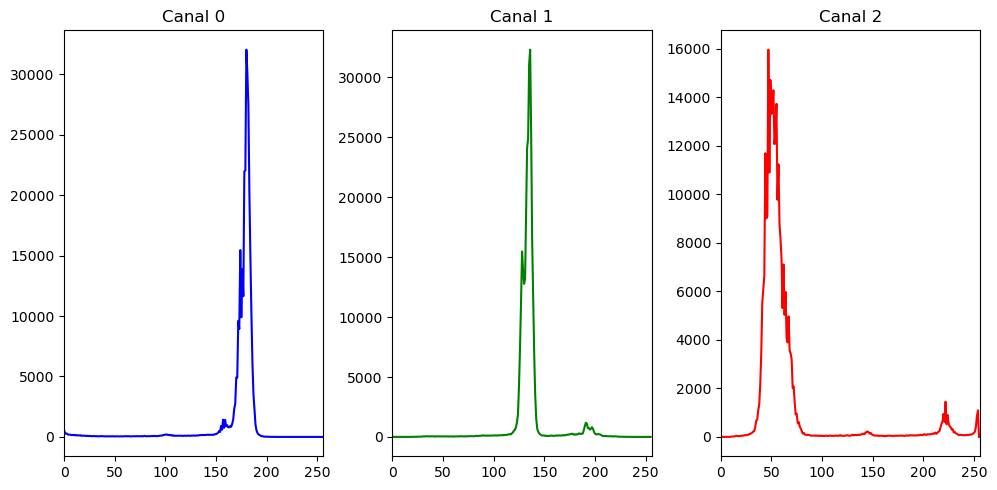

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Canal 0')
plt.plot(hist_Channel0, color='b')
plt.xlim([0, 256])

plt.subplot(132)
plt.title('Canal 1')
plt.plot(hist_Channel1, color='g')
plt.xlim([0, 256])

plt.subplot(133)
plt.title('Canal 2')
plt.plot(hist_Channel2, color='r')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


Preprocesamiento

Noise Filter

In [8]:
# Carga la imagen

# Calcula el histograma de la imagen
#hist, bin_edges = exposure.histogram(LegoImage)

# Dibuja el histograma
#plt.plot(bin_edges, hist)
#plt.title('Histograma de la imagen')
#plt.xlabel('Valor de píxel')
#plt.ylabel('Frecuencia')
#plt.show()

In [9]:
if LegoImage is not None:
    # Convierte la imagen a escala de grises (si es en color)
    if LegoImage.shape[2] == 3:
        gray_image = cv2.cvtColor(LegoImage, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = LegoImage

In [10]:
gray_image.shape #Have just one channel

(480, 640)

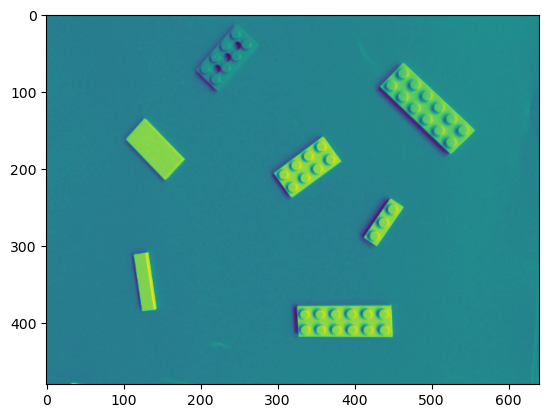

In [11]:
plt.imshow(gray_image)
plt.show()

In [12]:
# Show image
#cv2.imshow('Image', gray_image)
#cv2.waitKey(0)
hist = cv2.calcHist([gray_image], channels=[0], mask=None, histSize=[256], ranges=[0,255])
# Histogram
#cv2.destroyAllWindows()

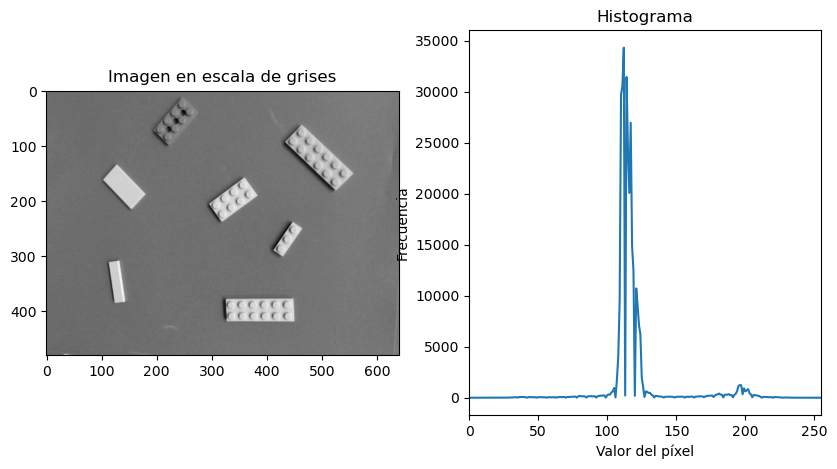

In [13]:
plt.figure(figsize=(10, 5))

# Subplot para la imagen en escala de grises
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen en escala de grises')

# Subplot para el histograma
plt.subplot(122)
plt.plot(hist)
plt.xlim([0, 255])
plt.xlabel('Valor del píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma')

# Mostrar la figura
plt.show()

In [14]:
#denoise_tv_1 = denoise_tv_chambolle(gray_image, weight=0.1)

In [15]:
#denoise_tv_2 = denoise_tv_chambolle(gray_image, weight=0.2)

fig, ax = plt.subplots(1, 2, 
                       figsize=(18, 14),
                       sharex=True, sharey=True)

ax[0].imshow(denoise_tv_1)
ax[0].axis('off')
ax[0].set_title('Total Variation denoising: weight 0.2', fontsize=20)

ax[1].imshow(denoise_tv_2)
ax[1].set_title('Total Variation denoising: weight 0.3', fontsize=20)
ax[1].axis('off')

fig.tight_layout()
plt.show()

In [16]:
#hist1, bin_edges1 = exposure.histogram(denoise_tv_1)
#hist2, bin_edges2 = exposure.histogram(denoise_tv_2)

Edges are computed as points that are extrema of the image gradient in the direction of the gradient. if it helps, you can think of them as the min and max points in a 1D function. The point is, edge pixels are a local notion: they just point out a significant difference between neighbouring pixels.
Contours are often obtained from edges, but they are aimed at being object contours. Thus, they need to be closed curves. You can think of them as boundaries (some Image Processing algorithms & librarires call them like that). When they are obtained from edges, you need to connect the edges in order to obtain a closed contour.
https://dontrepeatyourself.org/post/edge-and-contour-detection-with-opencv-and-python/

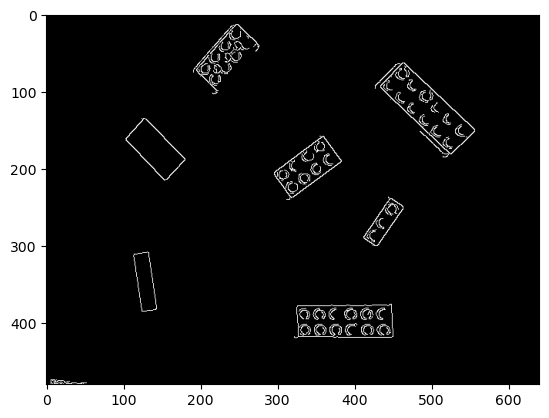

In [17]:
# Aplicar un detector de bordes (por ejemplo, Canny)
edges = cv2.Canny(gray_image, threshold1=5, threshold2=200)
plt.imshow(edges,cmap = 'gray')

In [18]:
# Definir el kernel (estructurante) para la operación de cierre
kernel = np.ones((4, 4), np.uint8)  # Puedes ajustar el tamaño del kernel según tus necesidades

# Realizar la operación de cierre
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

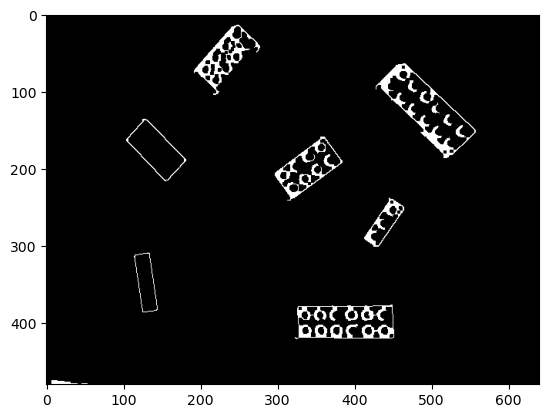

In [19]:
plt.imshow(closed_image,cmap = 'gray')

In [20]:
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(closed_image)  # Crear una máscara de ceros del mismo tamaño que los bordes

# Dibujar y rellenar los contornos en la máscara
mask=cv2.drawContours(mask, contours, -1, 1, thickness=cv2.FILLED)

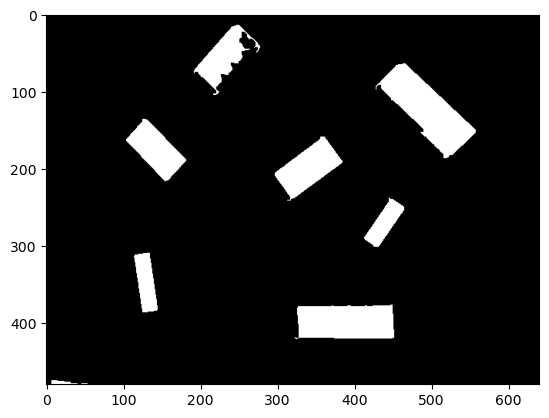

In [21]:
plt.imshow(mask,cmap = 'gray')

Another operator closely related to dilation and erosion is called an opening. It is actually an operation that consists of an erosion followed by a dilation. Pretty simple, right. For this, we will use the function cv2.morphologyEx()

In [22]:
opening=cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

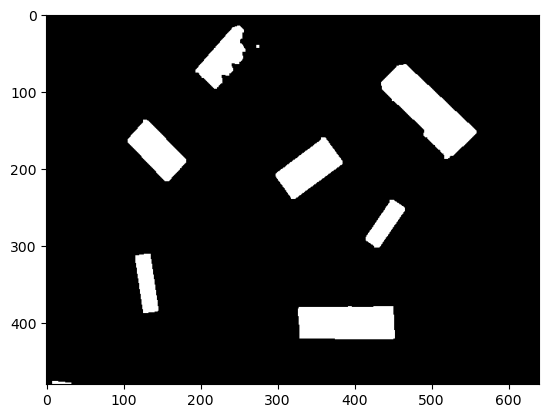

In [23]:
plt.imshow(opening,cmap = 'gray')

In [24]:
masked_image = cv2.bitwise_and(LegoImage, LegoImage, mask=opening)

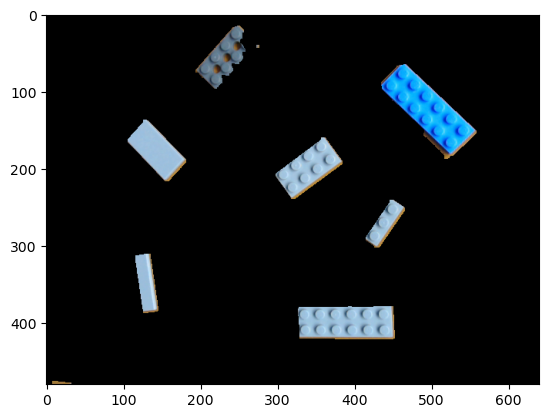

In [25]:
plt.imshow(masked_image)

In [26]:
gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

In [27]:
# Dibujar un rectángulo alrededor de la imagen
#bgr_image = cv2.cvtColor(masked_image, cv2.COLOR_GRAY2BGR)

In [28]:
contours, _ = cv2.findContours(gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

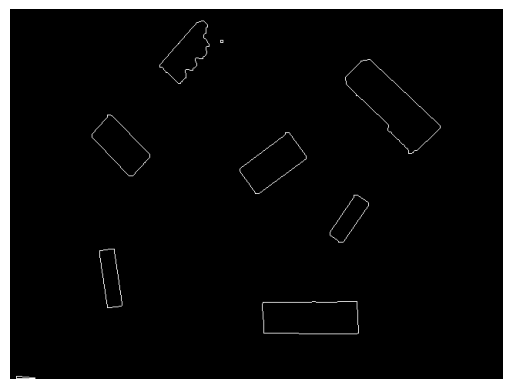

In [29]:
contour_image = np.zeros_like(masked_image)
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 1) 
plt.imshow(contour_image, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()# Adjust color and thickness as needed

In [30]:
len(contours)

9

https://theailearner.com/tag/cv2-minarearect/

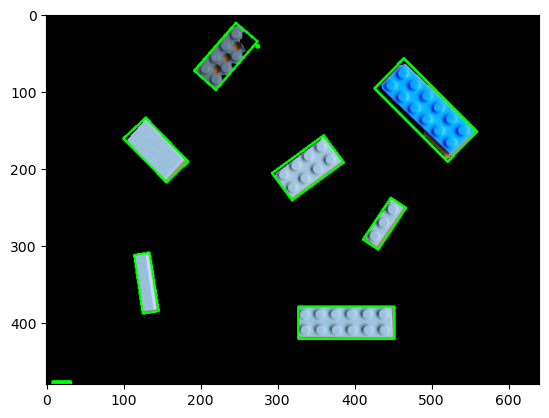

In [31]:
# Crear una copia de la imagen original
output_image = masked_image.copy()
rois = []
mult = 1
# Iterar a través de todos los contornos
for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.intp(box)
    cv2.drawContours(output_image, [box], 0, (0,255,0), 2) # this was mostly for debugging you may omit

    W = rect[1][0]
    H = rect[1][1]

    Xs = [i[0] for i in box]
    Ys = [i[1] for i in box]
    x1 = min(Xs)
    x2 = max(Xs)
    y1 = min(Ys)
    y2 = max(Ys)

    rotated = False
    angle = rect[2]

    if angle < -45:
        angle+=90
        rotated = True

    center = (int((x1+x2)/2), int((y1+y2)/2))
    size = (int(mult*(x2-x1)),int(mult*(y2-y1)))
    #cv2.circle(output_image, center, 10, (0,255,0), -1) #again this was mostly for debugging purposes

    M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

    cropped = cv2.getRectSubPix(output_image, size, center)    
    cropped = cv2.warpAffine(cropped, M, size)

    croppedW = W if not rotated else H 
    croppedH = H if not rotated else W

    croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW*mult), int(croppedH*mult)), (size[0]/2, size[1]/2))
    #plt.imshow(croppedRotated)
    #plt.show()
    rois.append(croppedRotated)

plt.imshow(output_image)
plt.show()

In [32]:
len(rois)

9

In [33]:
for i, roi in enumerate(rois):
    #cv2.imshow(f'ROI_{i}', roi)
    cv2.imwrite(f'ROI_{i}.jpg', roi)

In [34]:
print("s")

s
